# Acquire Monthly Energy Data from EIA

Import Dependencies

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import requests
import json
import copy


Define request_urls, Access API, Obtain Data, Store Data in 13 DataFrames

In [3]:
# Declare request_urls
fossil_coal_url = "https://api.eia.gov/v2/total-energy/data/?api_key=lbVdWUr3UhAbFPB6eZwvfB63A3PbBnPt0W4oKm0R&frequency=monthly&data[0]=value&facets[msn][]=CLETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
fossil_pet_url = "https://api.eia.gov/v2/total-energy/data/?api_key=lbVdWUr3UhAbFPB6eZwvfB63A3PbBnPt0W4oKm0R&frequency=monthly&data[0]=value&facets[msn][]=PAETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
fossil_natgas_url = "https://api.eia.gov/v2/total-energy/data/?api_key=lbVdWUr3UhAbFPB6eZwvfB63A3PbBnPt0W4oKm0R&frequency=monthly&data[0]=value&facets[msn][]=NGETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
fossil_othergas_url = "https://api.eia.gov/v2/total-energy/data/?api_key=lbVdWUr3UhAbFPB6eZwvfB63A3PbBnPt0W4oKm0R&frequency=monthly&data[0]=value&facets[msn][]=OJETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
nuclear_url = "https://api.eia.gov/v2/total-energy/data/?api_key=lbVdWUr3UhAbFPB6eZwvfB63A3PbBnPt0W4oKm0R&frequency=monthly&data[0]=value&facets[msn][]=NUETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
hydro_pumped_storage_url = "https://api.eia.gov/v2/total-energy/data/?api_key=lbVdWUr3UhAbFPB6eZwvfB63A3PbBnPt0W4oKm0R&frequency=monthly&data[0]=value&facets[msn][]=HPETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
renew_conventional_hydro_url = "https://api.eia.gov/v2/total-energy/data/?api_key=lbVdWUr3UhAbFPB6eZwvfB63A3PbBnPt0W4oKm0R&frequency=monthly&data[0]=value&facets[msn][]=HVETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
renew_biomass_wood_url = "https://api.eia.gov/v2/total-energy/data/?api_key=lbVdWUr3UhAbFPB6eZwvfB63A3PbBnPt0W4oKm0R&frequency=monthly&data[0]=value&facets[msn][]=WDETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
renew_biomass_waste_url = "https://api.eia.gov/v2/total-energy/data/?api_key=lbVdWUr3UhAbFPB6eZwvfB63A3PbBnPt0W4oKm0R&frequency=monthly&data[0]=value&facets[msn][]=WSETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
renew_geothermal_url = "https://api.eia.gov/v2/total-energy/data/?api_key=lbVdWUr3UhAbFPB6eZwvfB63A3PbBnPt0W4oKm0R&frequency=monthly&data[0]=value&facets[msn][]=GEETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
renew_solar_url = "https://api.eia.gov/v2/total-energy/data/?api_key=lbVdWUr3UhAbFPB6eZwvfB63A3PbBnPt0W4oKm0R&frequency=monthly&data[0]=value&facets[msn][]=SOETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
renew_wind_url = "https://api.eia.gov/v2/total-energy/data/?api_key=lbVdWUr3UhAbFPB6eZwvfB63A3PbBnPt0W4oKm0R&frequency=monthly&data[0]=value&facets[msn][]=WYETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

# We will calculate total energy for all sources.  API call below included to check validity of calculation and data acquisition.
total_energy_all_sources_url = "https://api.eia.gov/v2/total-energy/data/?api_key=lbVdWUr3UhAbFPB6eZwvfB63A3PbBnPt0W4oKm0R&frequency=monthly&data[0]=value&facets[msn][]=ELETPUS&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

# Create a list of urls
list_urls = [fossil_coal_url, fossil_pet_url, fossil_natgas_url, fossil_othergas_url, nuclear_url, hydro_pumped_storage_url, renew_conventional_hydro_url, renew_biomass_wood_url, renew_biomass_waste_url, renew_geothermal_url, renew_solar_url, renew_wind_url, total_energy_all_sources_url]

# Initialize a counter variable to create unique names for dataframes
i = 1

# Create an empty dictionary to store dataframes
dataframes = {}

# Iterate over urls in list_urls and ...
for item in list_urls:
    response_data = requests.get(item)  # Send GET request to URL
    data = response_data.json()  # Parse the response as JSON
    data = data['response']['data']  # Access the desired data within JSON

    # Create a unique name for each dataframe based on value of i
    df_name = f"df{i}"  # yields dictionary names (keys) -> df1, df2, df3, ...
    dataframes[df_name] = pd.json_normalize(data)  # Convert data to a DataFrame using json_normalize()

    i += 1  # Increment counter variable i

# Now we hae a dataframes dictionary w/ multiple RAW dfs, each retrieved from a different url.
# Each dictionary can be accessed using the df_name df1, df2, etc., as the key.

# Prepare RAW dataframes for merging

Data Prep Issues Log

In [4]:
# The raw dataframes will have merge issues.
# 1. 'period' column contains dtype = object.  It needs to be dtype = datetime.
# 2. 'msn' column contains dtype = object.  It needs to be dtype = string.
# 3. 'value' column contains dtype = object.  It needs to be dtype = float.
# 4. 'seriesDescription' column contains dtype = object.  It needs to be dtype = string.
# 5. 'unit' column contains dtype = object.  It needs to be dtype = string.
# 6. Unit column is not needed.
# 7. df4 returns ValueError: could not convert string to float: 'Not Available' from command: df['value'] = df['value'].astype('float64')

Create deep copies of the dataframes

In [5]:
copy_dataframes = copy.deepcopy(dataframes)

Address Issues


In [6]:
# Address data types, column names, df4 string to float issue and drop unit column.

for df_name, df in copy_dataframes.items():
    print(f"DataFrame: {df_name}")

    # Convert columns to desired types
    df['period'] = pd.to_datetime(df['period'])
    df['msn'] = df['msn'].astype('string')
    df['value'] = pd.to_numeric(df['value'], errors='coerce')  # errors='coerce' will convert 'Not Available' to NaN
    df['value'] = df['value'].astype('float64')
    df['seriesDescription'] = df['seriesDescription'].astype('string')

    # Drop 'unit' column if it exists
    if 'unit' in df.columns:
        df.drop('unit', axis=1, inplace=True)

    # Rename columns
    if set(df.columns) == {'period', 'msn', 'seriesDescription', 'value'}:
        df.columns = ['Date', 'EIA Code', 'Description', 'MWh']
    else:
        print(f"Column mismatch in DataFrame: {df_name}")

    print(df.dtypes)
    num_rows = len(df.index)
    print("Rows:", num_rows)
    num_cols = len(df.columns)
    print("Columns:", num_cols)
    print()

DataFrame: df1
Date           datetime64[ns]
EIA Code               string
Description            string
MWh                   float64
dtype: object
Rows: 609
Columns: 4

DataFrame: df2
Date           datetime64[ns]
EIA Code               string
Description            string
MWh                   float64
dtype: object
Rows: 609
Columns: 4

DataFrame: df3
Date           datetime64[ns]
EIA Code               string
Description            string
MWh                   float64
dtype: object
Rows: 609
Columns: 4

DataFrame: df4
Date           datetime64[ns]
EIA Code               string
Description            string
MWh                   float64
dtype: object
Rows: 609
Columns: 4

DataFrame: df5
Date           datetime64[ns]
EIA Code               string
Description            string
MWh                   float64
dtype: object
Rows: 609
Columns: 4

DataFrame: df6
Date           datetime64[ns]
EIA Code               string
Description            string
MWh                   float64
dtype: obj

In [7]:
# Display first and last two rows of each dataframe.

for df_name, df in copy_dataframes.items():
    print(f"DataFrame: {df_name}")
    print(df.head(2))  # Show first 2 rows
    print()
    print()
    print()  # Print two empty lines for exceptional clarity!

DataFrame: df1
        Date EIA Code                                        Description  \
0 2023-09-01  CLETPUS  Electricity Net Generation From Coal, All Sect...   
1 2023-08-01  CLETPUS  Electricity Net Generation From Coal, All Sect...   

         MWh  
0  60005.676  
1  78184.501  



DataFrame: df2
        Date EIA Code                                        Description  \
0 2023-09-01  PAETPUS  Electricity Net Generation From Petroleum, All...   
1 2023-08-01  PAETPUS  Electricity Net Generation From Petroleum, All...   

        MWh  
0  1620.178  
1  1690.722  



DataFrame: df3
        Date EIA Code                                        Description  \
0 2023-09-01  NGETPUS  Electricity Net Generation From Natural Gas, A...   
1 2023-08-01  NGETPUS  Electricity Net Generation From Natural Gas, A...   

          MWh  
0  164466.357  
1  199993.042  



DataFrame: df4
        Date EIA Code                                        Description  \
0 2023-09-01  OJETPUS  Electricit

# Merge Dataframes on ROW and COLUMN Axes

Data Visualization Pros & Cons of Using a Merged-on-ROW Axis Dataframe

Pros:
1. Time Series Analysis: If 'Date' is a common field, this approach is great for time series analysis, allowing you to track trends over time across all dataframes.
2. Consolidated View: It provides a consolidated view of all data, which is useful for comparing and contrasting data points across different time frames or EIA codes.
3. Simplicity in Plotting: Plotting is straightforward as each row represents a unique data point, making it easier to create line graphs, bar charts, etc.

Cons:
1. Potential Data Redundancy: If there's overlap in the data across dataframes, this method could lead to redundant data in the merged dataframe.
2. Large Dataset Handling: If individual dataframes are large, the merged dataframe could become unwieldy, making visualization and analysis more complex.
3. Limited Cross-Sectional Analysis: While excellent for time series, it might be less effective for analyzing relationships between different EIA codes or other columnar data points.

In [8]:
# Merge dataframes on row axis

# Concatenate dataframes along column axis
merged_on_row_monthly_df = pd.concat(copy_dataframes, axis=0)

# Reset index of merged dataframe
merged_on_row_monthly_df.reset_index(drop=True, inplace=True)

# Display merged dataframe
merged_on_row_monthly_df

,Date,EIA Code,Description,MWh
0,2023-09-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",60005.676
1,2023-08-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",78184.501
2,2023-07-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",78909.857
3,2023-06-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",57697.752
4,2023-05-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",43852.224
...,...,...,...,...
7912,1973-05-01,ELETPUS,Electricity Net Generation Total (including fr...,147395.124
7913,1973-04-01,ELETPUS,Electricity Net Generation Total (including fr...,139589.440
7914,1973-03-01,ELETPUS,Electricity Net Generation Total (including fr...,148158.370
7915,1973-02-01,ELETPUS,Electricity Net Generation Total (including fr...,143538.699


Active Dataframe = merged_on_row_monthly_df

# Create Interesting & Valuable Visualizations

Create a copy of merged_on_row_monthly_df

In [18]:
copy_row_df = copy.deepcopy(merged_on_row_monthly_df)

Assess merged-on-ROW dataframe and prepare for plotting.


In [19]:
# Assess merged-on-ROW dataframe

# Create list of unique EIA Codes from the dataframe to make sure values are as expected
print("Unique EIA Codes:")
unique_eia_codes = list(copy_row_df['EIA Code'].unique())
print(unique_eia_codes)
print()

# Create our own list of Sources, based on respective unique EIA Codes, so we can create a dictionary in the next step
print("Sources:")
source_list = ["Coal", "Petroleum", "Natural Gas", "Other Gas", "Nuclear", "Hydroelectric Pumped Storage", "Conventional Hydroelectric", "Biomass Wood", "Biomass Waste", "Geothermal", "Solar", "Wind", "All Sources"]
print(source_list)
print()

# Combine both lists into a dictionary so we can add the value to the dataframe in the next step
print("Dictionary containing key | value pairs for EIA Codes | Sources:")
combined_dict = dict(zip(unique_eia_codes, source_list))
print(combined_dict)
print()

# Add Source Column to the dataframe and set strings in Source column equal to the value in the dictionary, based on it's respective key.
copy_row_df['Source'] = copy_row_df['EIA Code'].map(combined_dict)

# Create list of unique EIA Codes from the dataframe to make sure values are as expected
print("Unique Descriptions:")
unique_descriptions = list(copy_row_df['Description'].unique())
print(unique_descriptions)
print()

# Determine the maximum and minimum dates in the merged_on_row_monthly_df
print("Earliest Year and Latest Year:")
max_x_value = df['Date'].max()
print(max_x_value)

min_x_value = df['Date'].min()
print(min_x_value)
print()

# Check if there are any NaN values in the column
print("Check for NaN values in 'MWh' column:")
has_nan = df['MWh'].isna().any()
print(has_nan)
print()

# Output the earliest date that the value in column 'MWh' exceeded zero for each Source.
# Create an empty dictionary to store the results
first_dates_exceeding_zero = {}

# Group by 'Source' and process each group
print("Initial Year of Electricity Generation:")
for source, group in copy_row_df.groupby('Source'):
    # Filter the group to only include rows where 'MWh' exceeds zero
    filtered_group = group[group['MWh'] > 0]

    # Find the earliest date where 'MWh' exceeds zero
    if not filtered_group.empty:
        first_date = filtered_group['Date'].min()
        first_dates_exceeding_zero[source] = first_date

print(first_dates_exceeding_zero)
print()

# Create a new dictionary excluding the specified timestamp (1973-01-01 00:00:00) so we can identify which sources started after 1973
# Define the timestamp you want to exclude
exclude_timestamp = pd.Timestamp('1973-01-01 00:00:00')

# Create a new dictionary excluding the specified timestamp
filtered_dates = {key: value for key, value in first_dates_exceeding_zero.items() if value != exclude_timestamp}

print(filtered_dates)

clean_row_df = copy.deepcopy(copy_row_df)

Unique EIA Codes:
['CLETPUS', 'PAETPUS', 'NGETPUS', 'OJETPUS', 'NUETPUS', 'HPETPUS', 'HVETPUS', 'WDETPUS', 'WSETPUS', 'GEETPUS', 'SOETPUS', 'WYETPUS', 'ELETPUS']

Sources:
['Coal', 'Petroleum', 'Natural Gas', 'Other Gas', 'Nuclear', 'Hydroelectric Pumped Storage', 'Conventional Hydroelectric', 'Biomass Wood', 'Biomass Waste', 'Geothermal', 'Solar', 'Wind', 'All Sources']

Dictionary containing key | value pairs for EIA Codes | Sources:
{'CLETPUS': 'Coal', 'PAETPUS': 'Petroleum', 'NGETPUS': 'Natural Gas', 'OJETPUS': 'Other Gas', 'NUETPUS': 'Nuclear', 'HPETPUS': 'Hydroelectric Pumped Storage', 'HVETPUS': 'Conventional Hydroelectric', 'WDETPUS': 'Biomass Wood', 'WSETPUS': 'Biomass Waste', 'GEETPUS': 'Geothermal', 'SOETPUS': 'Solar', 'WYETPUS': 'Wind', 'ELETPUS': 'All Sources'}

Unique Descriptions:
['Electricity Net Generation From Coal, All Sectors in Million Kilowatthours', 'Electricity Net Generation From Petroleum, All Sectors in Million Kilowatthours', 'Electricity Net Generation Fro

In [20]:
# Inspect cleaned dataframe
clean_row_df.head(20)

,Date,EIA Code,Description,MWh,Source
0,2023-09-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",60005.676,Coal
1,2023-08-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",78184.501,Coal
2,2023-07-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",78909.857,Coal
3,2023-06-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",57697.752,Coal
4,2023-05-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",43852.224,Coal
5,2023-04-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",40078.668,Coal
6,2023-03-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",50067.281,Coal
7,2023-02-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",46487.928,Coal
8,2023-01-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",61290.875,Coal
9,2022-12-01,CLETPUS,"Electricity Net Generation From Coal, All Sect...",73380.892,Coal


Active Dataframe = clean_row_df

Add smoothed values for 'All Sources' Source.

In [21]:
# ***************************************************************

#All Sources --> sum 'MWh' for each unique date
clean_row_df = clean_row_df.groupby(['Date', 'EIA Code', 'Description', 'Source']).sum().reset_index()

# Create an empty list to store new rows
new_rows = []

# Iterate over each unique date
for date in copy_row_df['Date'].unique():
    # Calculate the sum of 'MWh' for the fossil sources on this date
    allsources_mwh_sum = copy_row_df.loc[(copy_row_df['Source'].isin(['All Sources'])) & (copy_row_df['Date'] == date), 'MWh'].sum()

    # Create a new row as a DataFrame for this date
    new_row_df = pd.DataFrame([{
        'Date': date,
        'EIA Code': 'SUM',
        'Description': 'Electricity Generation - Smoothed 12 Month Rolling Average',
        'MWh': allsources_mwh_sum,
        'Source': 'Smoothed Sum'
    }])

    # Add the new DataFrame to the list
    new_rows.append(new_row_df)

# Concatenate the list of new rows with the original DataFrame
clean_row_df = pd.concat([copy_row_df, pd.concat(new_rows, ignore_index=True)], ignore_index=True)
# Now, 'modified_df' contains an additional row for each date with the summed 'MWh' values for smoothed 12 month rolling average.f

In [23]:
# Check if 'xFOSSIL' is in the 'Source' column
print("Unique Sources:")
unique_sources = list(clean_row_df['Source'].unique())
print(unique_sources)
print()

Unique Sources:
['Coal', 'Petroleum', 'Natural Gas', 'Other Gas', 'Nuclear', 'Hydroelectric Pumped Storage', 'Conventional Hydroelectric', 'Biomass Wood', 'Biomass Waste', 'Geothermal', 'Solar', 'Wind', 'All Sources', 'Smoothed Sum']



Plot all data

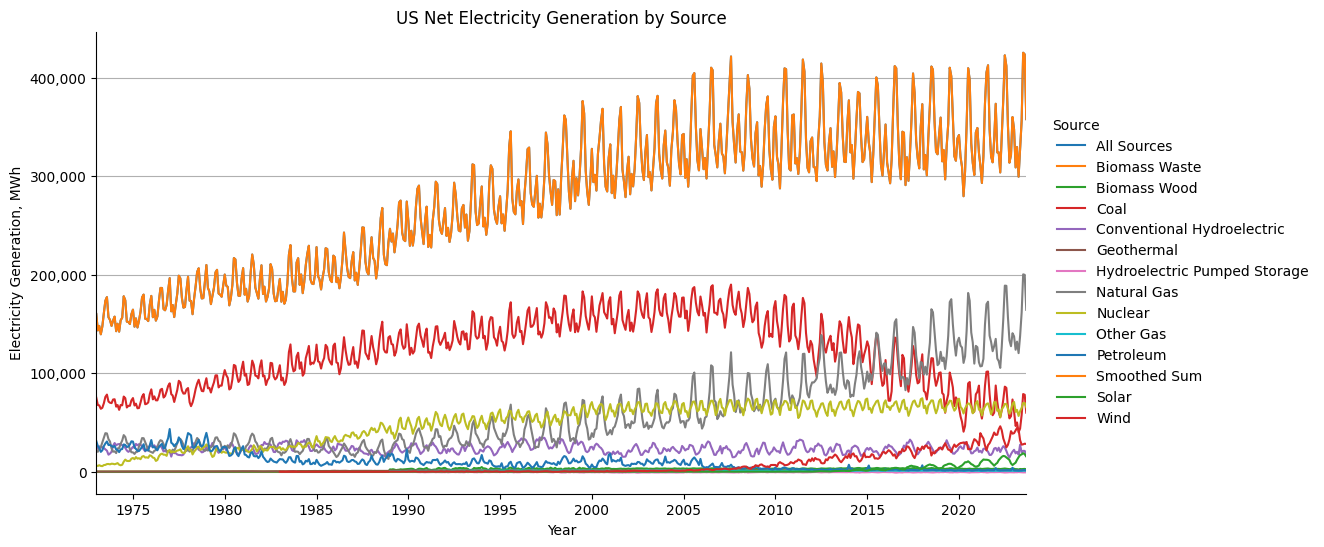

<Figure size 640x480 with 0 Axes>

In [24]:
# Set the plot size for better visibility
plt.figure(figsize=(12, 6))

# Group by 'Source' and plot
for item, group in clean_row_df.groupby('Source'):
    plt.plot(group['Date'], group['MWh'], label=item)

# Formatting y-axis labels to add commas as thousands separators
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust x-axis limits to include full date range
min_date = clean_row_df['Date'].min() - pd.DateOffset(days=3650)
max_date = clean_row_df['Date'].max() + pd.DateOffset(days=3650)
# plt.xlim(min_date, max_date)
plt.xlim([min_x_value, max_x_value])  # Sets x-axis range from earliest year to latest year

# Optionally, format the date labels for better readability
# plt.gcf().autofmt_xdate()

# Adding title and labels
plt.title('US Net Electricity Generation by Source')
plt.xlabel('Year')
plt.ylabel('Electricity Generation, MWh')

# Adding a legend
legend = plt.legend(frameon=False, title='Source', bbox_to_anchor=(1.02, .84), loc='upper left')

# Left align the title of the legend
legend.get_title().set_position((-107, 0))

# Access the current axes, gca stands for 'get current axis'
ax = plt.gca()

# Hide each spine (top, right, bottom, left)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Add grid lines at the major y-axis ticks
plt.grid(axis='y')

# {'Hydroelectric Pumped Storage': Timestamp('1990-03-01 00:00:00'), 'Other Gas': Timestamp('1989-01-01 00:00:00'), 'Solar': Timestamp('1984-02-01 00:00:00'), 'Wind': Timestamp('1983-01-01 00:00:00')}

# Show plot
plt.show()

# Save the plot to a .png file
plt.savefig('US Net Electricity Generation by Source.png')

Renewable vs Fossil vs Nuclear

In [25]:
# Create new dataframe with summed fossil, renewable, nuclear columns.
modified_df = copy.deepcopy(clean_row_df)

# Sources:
# ['Coal', 'Petroleum', 'Natural Gas', 'Other Gas',
# 'Nuclear',
# 'Hydroelectric Pumped Storage',
# 'Conventional Hydroelectric', 'Biomass Wood', 'Biomass Waste', 'Geothermal', 'Solar', 'Wind',
# 'All Sources']

# Columns:
# ['Date', 'EIA Code', 'Description', 'MWh', 'Source']

# ***************************************************************

#FOSSIL --> sum 'MWh' for each unique date
modified_df = modified_df.groupby(['Date', 'EIA Code', 'Description', 'Source']).sum().reset_index()
# Create an empty list to store new rows
new_rows = []

# Iterate over each unique date
for date in modified_df['Date'].unique():
    # Calculate the sum of 'MWh' for the fossil sources on this date
    fossil_mwh_sum = modified_df.loc[(modified_df['Source'].isin(['Coal', 'Petroleum', 'Natural Gas', 'Other Gas'])) & (modified_df['Date'] == date), 'MWh'].sum()

    # Create a new row as a DataFrame for this date
    new_row_df = pd.DataFrame([{
        'Date': date,
        'EIA Code': 'xFOSSIL',
        'Description': 'Electricity Generation - Fossil',
        'MWh': fossil_mwh_sum,
        'Source': 'Fossil'
    }])

    # Add the new DataFrame to the list
    new_rows.append(new_row_df)

# Concatenate the list of new rows with the original DataFrame
modified_df = pd.concat([modified_df, pd.concat(new_rows, ignore_index=True)], ignore_index=True)
# Now, 'modified_df' contains an additional row for each date with the summed 'MWh' values for fossil fuels

# ***************************************************************

#RENEWABLE --> sum 'MWh' for each unique date
modified_df = modified_df.groupby(['Date', 'EIA Code', 'Description', 'Source']).sum().reset_index()
# Create an empty list to store new rows
new_rows_2 = []

# Iterate over each unique date
for date in modified_df['Date'].unique():
    # Calculate the sum of 'MWh' for the fossil sources on this date
    renewable_mwh_sum = modified_df.loc[(modified_df['Source'].isin(['Conventional Hydroelectric', 'Biomass Wood', 'Biomass Waste', 'Geothermal', 'Solar', 'Wind'])) & (modified_df['Date'] == date), 'MWh'].sum()

    # Create a new row as a DataFrame for this date
    new_row_df = pd.DataFrame([{
        'Date': date,
        'EIA Code': 'xRENEW',
        'Description': 'Electricity Generation - Renewable',
        'MWh': renewable_mwh_sum,
        'Source': 'Renewable'
    }])

    # Add the new DataFrame to the list
    new_rows_2.append(new_row_df)

# Concatenate the list of new rows with the original DataFrame
modified_df = pd.concat([modified_df, pd.concat(new_rows_2, ignore_index=True)], ignore_index=True)
# Now, 'modified_df' contains an additional row for each date with the summed 'MWh' values for fossil fuels


In [26]:
# Check if 'xFOSSIL' is in the 'Source' column
print("Unique Sources:")
unique_sources = list(modified_df['Source'].unique())
print(unique_sources)
print()

Unique Sources:
['Coal', 'All Sources', 'Geothermal', 'Hydroelectric Pumped Storage', 'Conventional Hydroelectric', 'Natural Gas', 'Nuclear', 'Other Gas', 'Petroleum', 'Solar', 'Smoothed Sum', 'Biomass Wood', 'Biomass Waste', 'Wind', 'Fossil', 'Renewable']



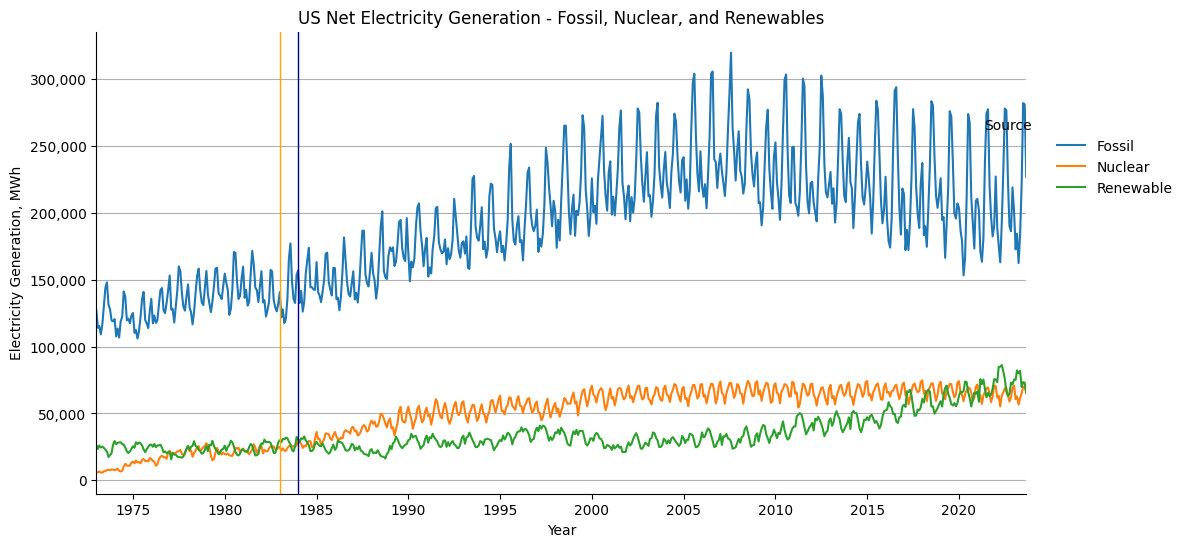

In [31]:
# Chart Fossil, Nuclear, and Renewables

# Define the list of EIA Codes to exclude
excluded_sources = ['Coal', 'Petroleum', 'Natural Gas', 'Other Gas', 'Hydroelectric Pumped Storage', 'Conventional Hydroelectric', 'Biomass Wood', 'Biomass Waste', 'Geothermal', 'Solar', 'Wind', 'All Sources', 'Smoothed Sum']

compare_fossil_nuclear_renewable_df = modified_df[~modified_df['Source'].isin(excluded_sources)]

# Set the plot size for better visibility
plt.figure(figsize=(12, 6))

# Group by 'EIA Code' and plot
for item, group in compare_fossil_nuclear_renewable_df.groupby('Source'):
    plt.plot(group['Date'], group['MWh'], label=item)

# Formatting y-axis labels to add commas as thousands separators
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust x-axis limits to include full date range
min_date, max_date = compare_fossil_nuclear_renewable_df['Date'].min(), compare_fossil_nuclear_renewable_df['Date'].max()
# plt.xlim(min_date, max_date)
plt.xlim([min_x_value, max_x_value])  # Sets x-axis range from earliest year to latest year

# Optionally, format the date labels for better readability
# plt.gcf().autofmt_xdate()

# Adding title and labels
plt.title('US Net Electricity Generation - Fossil, Nuclear, and Renewables')
plt.xlabel('Year')
plt.ylabel('Electricity Generation, MWh')

# Adding a legend
legend = plt.legend(frameon=False, title='Source', bbox_to_anchor=(1.02, .84), loc='upper left')

# Left align the title of the legend
legend.get_title().set_position((-107, 0))

# Access the current axes, gca stands for 'get current axis'
ax = plt.gca()

# Hide each spine (top, right, bottom, left)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Add grid lines at the major y-axis ticks
plt.grid(axis='y')

# Add a red vertical line at a specific date, in this case, 2010.
wind_start_date = pd.to_datetime('1983-01-01 00:00:00')  # Specify the dateto add a vertical line
solar_start_date = pd.to_datetime('1984-01-01 00:00:00')  # Specify the dateto add a vertical line
other_gas_start_date = pd.to_datetime('1989-01-01 00:00:00')  # Specify the dateto add a vertical line
hydropumped_start_date = pd.to_datetime('1990-01-01 00:00:00')  # Specify the dateto add a vertical line
plt.axvline(x=wind_start_date, color='orange', linestyle='solid', linewidth=1)
plt.axvline(x=solar_start_date, color='darkblue', linestyle='solid', linewidth=1)
# plt.axvline(x=other_gas_start_date, color='gold', linestyle='solid', linewidth=1)
# plt.axvline(x=hydropumped_start_date, color='maroon', linestyle='solid', linewidth=1)

# {'Hydroelectric Pumped Storage': Timestamp('1990-03-01 00:00:00'), 'Other Gas': Timestamp('1989-01-01 00:00:00'), 'Solar': Timestamp('1984-02-01 00:00:00'), 'Wind': Timestamp('1983-01-01 00:00:00')}

# Show plot
plt.show()


*************************************************************************************************************************************************

Exclude total generation

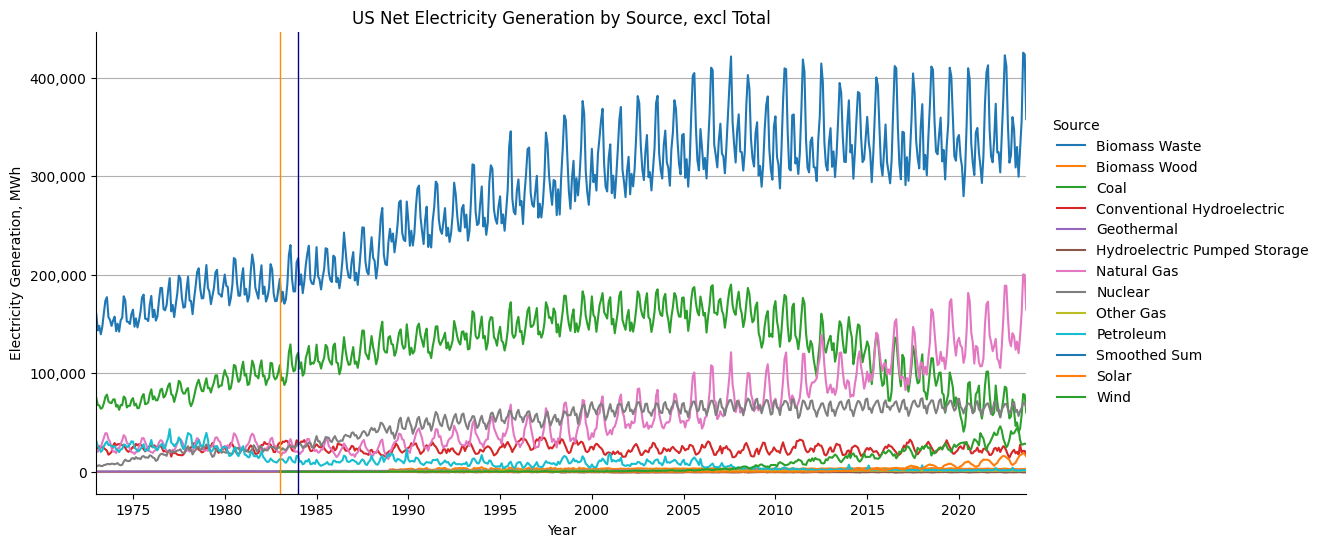

In [32]:
# Set the plot size for better visibility
# Exclude the specific Source "All Sources"
excluded = 'All Sources'
no_total_df = clean_row_df[clean_row_df['Source'] != excluded]

# Set the plot size for better visibility
plt.figure(figsize=(12, 6))

# Group by 'EIA Code' and plot
for item, group in no_total_df.groupby('Source'):
    plt.plot(group['Date'], group['MWh'], label=item)

# Formatting y-axis labels to add commas as thousands separators
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust x-axis limits to include full date range
min_date, max_date = no_total_df['Date'].min(), no_total_df['Date'].max()
# plt.xlim(min_date, max_date)
plt.xlim([min_x_value, max_x_value])  # Sets x-axis range from earliest year to latest year

# Optionally, format the date labels for better readability
# plt.gcf().autofmt_xdate()

# Adding title and labels
plt.title('US Net Electricity Generation by Source, excl Total')
plt.xlabel('Year')
plt.ylabel('Electricity Generation, MWh')

# Adding a legend
legend = plt.legend(frameon=False, title='Source', bbox_to_anchor=(1.02, .84), loc='upper left')

# Left align the title of the legend
legend.get_title().set_position((-107, 0))

# Access the current axes, gca stands for 'get current axis'
ax = plt.gca()

# Hide each spine (top, right, bottom, left)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Add grid lines at the major y-axis ticks
plt.grid(axis='y')

# Add a red vertical line at a specific date, in this case, 2010.
wind_start_date = pd.to_datetime('1983-01-01 00:00:00')  # Specify the dateto add a vertical line
solar_start_date = pd.to_datetime('1984-01-01 00:00:00')  # Specify the dateto add a vertical line
other_gas_start_date = pd.to_datetime('1989-01-01 00:00:00')  # Specify the dateto add a vertical line
hydropumped_start_date = pd.to_datetime('1990-01-01 00:00:00')  # Specify the dateto add a vertical line
plt.axvline(x=wind_start_date, color='darkorange', linestyle='solid', linewidth=1)
plt.axvline(x=solar_start_date, color='darkblue', linestyle='solid', linewidth=1)
# plt.axvline(x=other_gas_start_date, color='gold', linestyle='solid', linewidth=1)
# plt.axvline(x=hydropumped_start_date, color='maroon', linestyle='solid', linewidth=1)

# {'Hydroelectric Pumped Storage': Timestamp('1990-03-01 00:00:00'), 'Other Gas': Timestamp('1989-01-01 00:00:00'), 'Solar': Timestamp('1984-02-01 00:00:00'), 'Wind': Timestamp('1983-01-01 00:00:00')}

# Show plot
plt.show()

just renewable

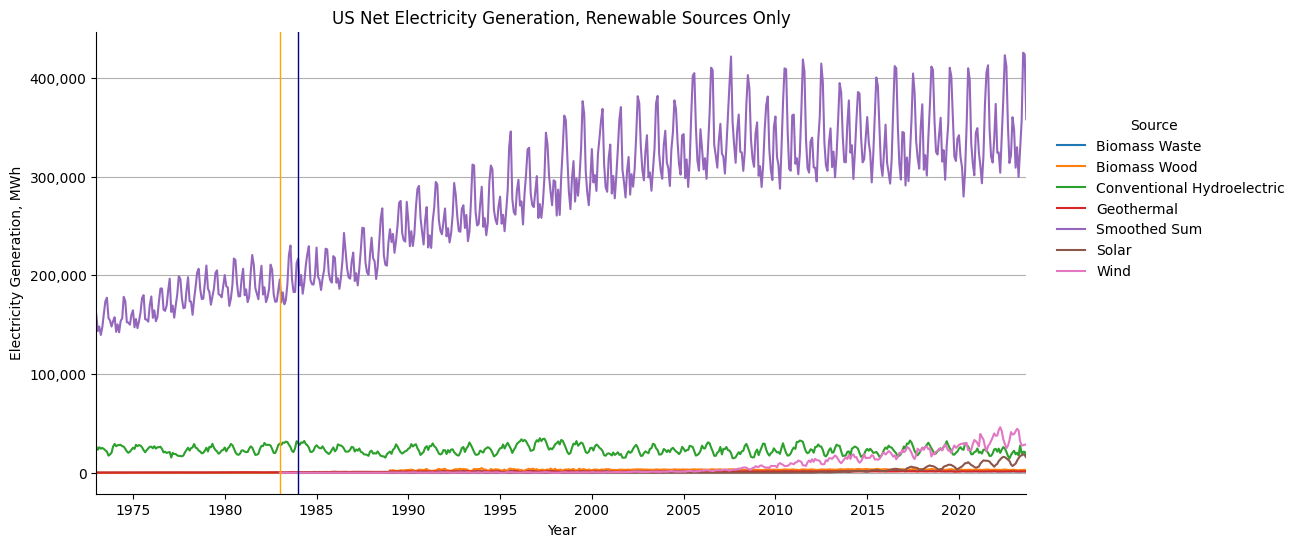

In [33]:
# Define the list of EIA Codes to exclude
excluded_sources = ['Coal', 'Petroleum', 'Natural Gas', 'Other Gas', 'Nuclear', 'Hydroelectric Pumped Storage', 'All Sources']

renewable_df = clean_row_df[~clean_row_df['Source'].isin(excluded_sources)]

# Set the plot size for better visibility
plt.figure(figsize=(12, 6))

# Group by 'EIA Code' and plot
for item, group in renewable_df.groupby('Source'):
    plt.plot(group['Date'], group['MWh'], label=item)

# Formatting y-axis labels to add commas as thousands separators
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust x-axis limits to include full date range
min_date, max_date = no_total_df['Date'].min(), no_total_df['Date'].max()
# plt.xlim(min_date, max_date)
plt.xlim([min_x_value, max_x_value])  # Sets x-axis range from earliest year to latest year

# Optionally, format the date labels for better readability
# plt.gcf().autofmt_xdate()

# Adding title and labels
plt.title('US Net Electricity Generation, Renewable Sources Only')
plt.xlabel('Year')
plt.ylabel('Electricity Generation, MWh')

# Adding a legend
legend = plt.legend(frameon=False, title='Source', bbox_to_anchor=(1.02, .84), loc='upper left')

# Left align the title of the legend
legend.get_title().set_position((-17, 0))

# Access the current axes, gca stands for 'get current axis'
ax = plt.gca()

# Hide each spine (top, right, bottom, left)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Add grid lines at the major y-axis ticks
plt.grid(axis='y')

# Add a red vertical line at a specific date, in this case, 2010.
wind_start_date = pd.to_datetime('1983-01-01 00:00:00')  # Specify the dateto add a vertical line
solar_start_date = pd.to_datetime('1984-01-01 00:00:00')  # Specify the dateto add a vertical line
other_gas_start_date = pd.to_datetime('1989-01-01 00:00:00')  # Specify the dateto add a vertical line
hydropumped_start_date = pd.to_datetime('1990-01-01 00:00:00')  # Specify the dateto add a vertical line
plt.axvline(x=wind_start_date, color='orange', linestyle='solid', linewidth=1)
plt.axvline(x=solar_start_date, color='darkblue', linestyle='solid', linewidth=1)
# plt.axvline(x=other_gas_start_date, color='gold', linestyle='solid', linewidth=1)
# plt.axvline(x=hydropumped_start_date, color='maroon', linestyle='solid', linewidth=1)

# {'Hydroelectric Pumped Storage': Timestamp('1990-03-01 00:00:00'), 'Other Gas': Timestamp('1989-01-01 00:00:00'), 'Solar': Timestamp('1984-02-01 00:00:00'), 'Wind': Timestamp('1983-01-01 00:00:00')}

# Show plot
plt.show()

In [34]:

plt.plot(compare_df['Date'], compare_df['Fossil'], label='Fossil')
plt.plot(compare_df['Date'], compare_df['Renewable'], label='Renewable')
plt.plot(compare_df['Date'], compare_df['Nuclear'], label='Nuclear')

plt.xlabel('Date')
plt.ylabel('MWh')
plt.legend()

plt.show()



# Define the list of EIA Codes to exclude
excluded_sources = ['Coal', 'Petroleum', 'Natural Gas', 'Other Gas', 'Hydroelectric Pumped Storage', 'All Sources']
lowco2_df = clean_row_df[~clean_row_df['Source'].isin(excluded_sources)]

# Set the plot size for better visibility
plt.figure(figsize=(12, 6))

# Group by 'EIA Code' and plot
for item, group in lowco2_df.groupby('Source'):
    plt.plot(group['Date'], group['MWh'], label=item)

# Formatting y-axis labels to add commas as thousands separators
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust x-axis limits to include full date range
min_date, max_date = no_total_df['Date'].min(), no_total_df['Date'].max()
# plt.xlim(min_date, max_date)
plt.xlim([min_x_value, max_x_value])  # Sets x-axis range from earliest year to latest year

# Optionally, format the date labels for better readability
# plt.gcf().autofmt_xdate()

# Adding title and labels
plt.title('US Net Electricity Generation, Clean Sources Only (Renewable + Nuclear)')
plt.xlabel('Year')
plt.ylabel('Electricity Generation, MWh')

# Adding a legend
legend = plt.legend(frameon=False, title='Source', bbox_to_anchor=(1.02, .84), loc='upper left')

# Left align the title of the legend
legend.get_title().set_position((-107, 0))

# Access the current axes, gca stands for 'get current axis'
ax = plt.gca()

# Hide each spine (top, right, bottom, left)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Add grid lines at the major y-axis ticks
plt.grid(axis='y')

# Add a red vertical line at a specific date, in this case, 2010.
wind_start_date = pd.to_datetime('1983-01-01 00:00:00')  # Specify the dateto add a vertical line
solar_start_date = pd.to_datetime('1984-01-01 00:00:00')  # Specify the dateto add a vertical line
other_gas_start_date = pd.to_datetime('1989-01-01 00:00:00')  # Specify the dateto add a vertical line
hydropumped_start_date = pd.to_datetime('1990-01-01 00:00:00')  # Specify the dateto add a vertical line
plt.axvline(x=wind_start_date, color='orange', linestyle='solid', linewidth=1)
plt.axvline(x=solar_start_date, color='darkblue', linestyle='solid', linewidth=1)
# plt.axvline(x=other_gas_start_date, color='gold', linestyle='solid', linewidth=1)
# plt.axvline(x=hydropumped_start_date, color='maroon', linestyle='solid', linewidth=1)

# {'Hydroelectric Pumped Storage': Timestamp('1990-03-01 00:00:00'), 'Other Gas': Timestamp('1989-01-01 00:00:00'), 'Solar': Timestamp('1984-02-01 00:00:00'), 'Wind': Timestamp('1983-01-01 00:00:00')}

# Show plot
plt.show()

NameError: name 'compare_df' is not defined

Just Low CO2

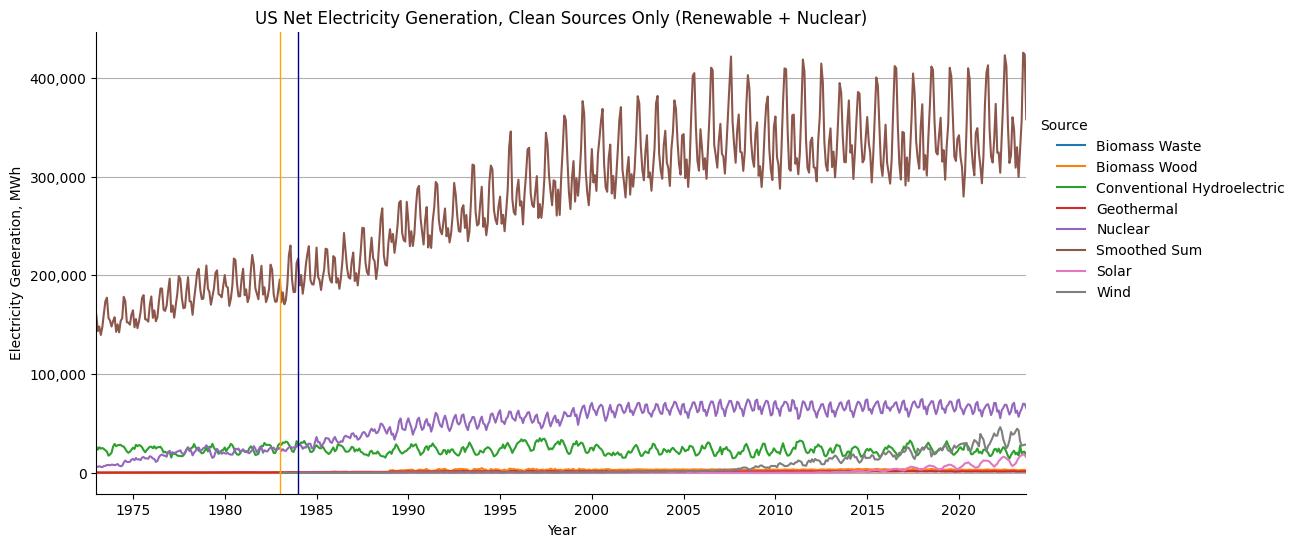

In [35]:
# Define the list of EIA Codes to exclude
excluded_sources = ['Coal', 'Petroleum', 'Natural Gas', 'Other Gas', 'Hydroelectric Pumped Storage', 'All Sources']
lowco2_df = clean_row_df[~clean_row_df['Source'].isin(excluded_sources)]

# Set the plot size for better visibility
plt.figure(figsize=(12, 6))

# Group by 'EIA Code' and plot
for item, group in lowco2_df.groupby('Source'):
    plt.plot(group['Date'], group['MWh'], label=item)

# Formatting y-axis labels to add commas as thousands separators
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust x-axis limits to include full date range
min_date, max_date = no_total_df['Date'].min(), no_total_df['Date'].max()
# plt.xlim(min_date, max_date)
plt.xlim([min_x_value, max_x_value])  # Sets x-axis range from earliest year to latest year

# Optionally, format the date labels for better readability
# plt.gcf().autofmt_xdate()

# Adding title and labels
plt.title('US Net Electricity Generation, Clean Sources Only (Renewable + Nuclear)')
plt.xlabel('Year')
plt.ylabel('Electricity Generation, MWh')

# Adding a legend
legend = plt.legend(frameon=False, title='Source', bbox_to_anchor=(1.02, .84), loc='upper left')

# Left align the title of the legend
legend.get_title().set_position((-107, 0))

# Access the current axes, gca stands for 'get current axis'
ax = plt.gca()

# Hide each spine (top, right, bottom, left)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Add grid lines at the major y-axis ticks
plt.grid(axis='y')

# Add a red vertical line at a specific date, in this case, 2010.
wind_start_date = pd.to_datetime('1983-01-01 00:00:00')  # Specify the dateto add a vertical line
solar_start_date = pd.to_datetime('1984-01-01 00:00:00')  # Specify the dateto add a vertical line
other_gas_start_date = pd.to_datetime('1989-01-01 00:00:00')  # Specify the dateto add a vertical line
hydropumped_start_date = pd.to_datetime('1990-01-01 00:00:00')  # Specify the dateto add a vertical line
plt.axvline(x=wind_start_date, color='orange', linestyle='solid', linewidth=1)
plt.axvline(x=solar_start_date, color='darkblue', linestyle='solid', linewidth=1)
# plt.axvline(x=other_gas_start_date, color='gold', linestyle='solid', linewidth=1)
# plt.axvline(x=hydropumped_start_date, color='maroon', linestyle='solid', linewidth=1)

# {'Hydroelectric Pumped Storage': Timestamp('1990-03-01 00:00:00'), 'Other Gas': Timestamp('1989-01-01 00:00:00'), 'Solar': Timestamp('1984-02-01 00:00:00'), 'Wind': Timestamp('1983-01-01 00:00:00')}

# Show plot
plt.show()

Just wind

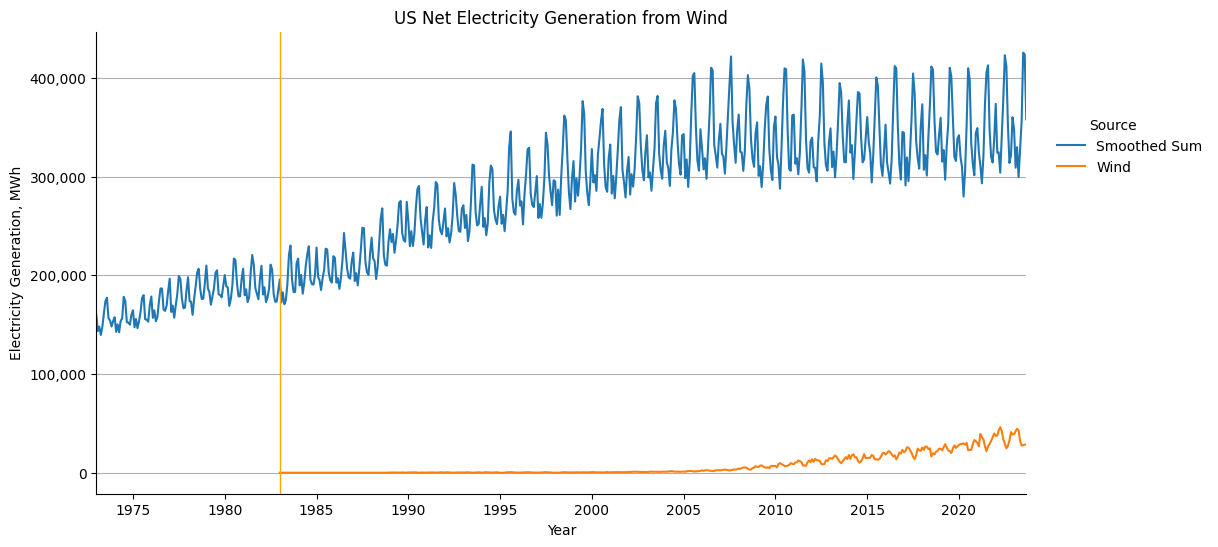

In [36]:
# Define the list of EIA Codes to exclude
excluded_sources = ['Coal', 'Petroleum', 'Natural Gas', 'Other Gas', 'Nuclear', 'Hydroelectric Pumped Storage', 'Conventional Hydroelectric', 'Biomass Wood', 'Biomass Waste', 'Geothermal', 'Solar', 'All Sources']

wind_df = clean_row_df[~clean_row_df['Source'].isin(excluded_sources)]

# Set the plot size for better visibility
plt.figure(figsize=(12, 6))

# Group by 'EIA Code' and plot
for item, group in wind_df.groupby('Source'):
    plt.plot(group['Date'], group['MWh'], label=item)

# Formatting y-axis labels to add commas as thousands separators
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust x-axis limits to include full date range
min_date, max_date = no_total_df['Date'].min(), no_total_df['Date'].max()
# plt.xlim(min_date, max_date)
plt.xlim([min_x_value, max_x_value])  # Sets x-axis range from earliest year to latest year

# Optionally, format the date labels for better readability
# plt.gcf().autofmt_xdate()

# Adding title and labels
plt.title('US Net Electricity Generation from Wind')
plt.xlabel('Year')
plt.ylabel('Electricity Generation, MWh')

# Adding a legend
legend = plt.legend(frameon=False, title='Source', bbox_to_anchor=(1.02, .84), loc='upper left')

# Left align the title of the legend
legend.get_title().set_position((-17, 0))

# Access the current axes, gca stands for 'get current axis'
ax = plt.gca()

# Hide each spine (top, right, bottom, left)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Add grid lines at the major y-axis ticks
plt.grid(axis='y')

# Add a red vertical line at a specific date, in this case, 2010.
wind_start_date = pd.to_datetime('1983-01-01 00:00:00')  # Specify the dateto add a vertical line
solar_start_date = pd.to_datetime('1984-01-01 00:00:00')  # Specify the dateto add a vertical line
other_gas_start_date = pd.to_datetime('1989-01-01 00:00:00')  # Specify the dateto add a vertical line
hydropumped_start_date = pd.to_datetime('1990-01-01 00:00:00')  # Specify the dateto add a vertical line
plt.axvline(x=wind_start_date, color='orange', linestyle='solid', linewidth=1)
# plt.axvline(x=solar_start_date, color='darkblue', linestyle='solid', linewidth=1)
# plt.axvline(x=other_gas_start_date, color='gold', linestyle='solid', linewidth=1)
# plt.axvline(x=hydropumped_start_date, color='maroon', linestyle='solid', linewidth=1)

# {'Hydroelectric Pumped Storage': Timestamp('1990-03-01 00:00:00'), 'Other Gas': Timestamp('1989-01-01 00:00:00'), 'Solar': Timestamp('1984-02-01 00:00:00'), 'Wind': Timestamp('1983-01-01 00:00:00')}

# Show plot
plt.show()

Large Low CO2 sources only

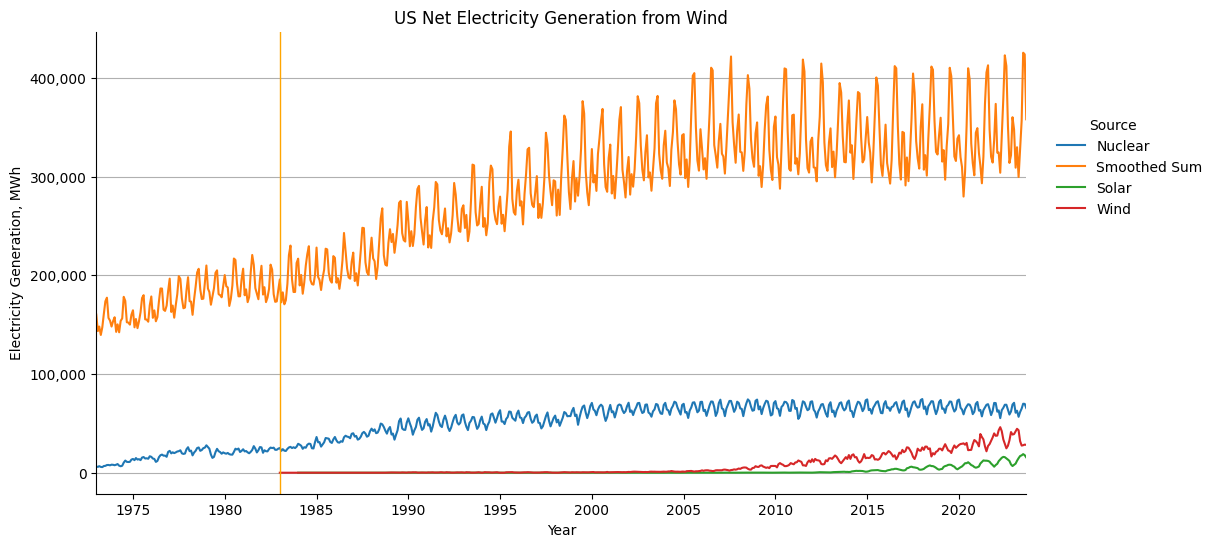

In [37]:
# Define the list of EIA Codes to exclude
excluded_sources = ['Coal', 'Petroleum', 'Natural Gas', 'Other Gas', 'Hydroelectric Pumped Storage', 'Conventional Hydroelectric', 'Biomass Wood', 'Biomass Waste', 'Geothermal', 'All Sources']

large_lowco2_df = clean_row_df[~clean_row_df['Source'].isin(excluded_sources)]

# Set the plot size for better visibility
plt.figure(figsize=(12, 6))

# Group by 'EIA Code' and plot
for item, group in large_lowco2_df.groupby('Source'):
    plt.plot(group['Date'], group['MWh'], label=item)

# Formatting y-axis labels to add commas as thousands separators
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust x-axis limits to include full date range
min_date, max_date = no_total_df['Date'].min(), no_total_df['Date'].max()
# plt.xlim(min_date, max_date)
plt.xlim([min_x_value, max_x_value])  # Sets x-axis range from earliest year to latest year

# Optionally, format the date labels for better readability
# plt.gcf().autofmt_xdate()

# Adding title and labels
plt.title('US Net Electricity Generation from Wind')
plt.xlabel('Year')
plt.ylabel('Electricity Generation, MWh')

# Adding a legend
legend = plt.legend(frameon=False, title='Source', bbox_to_anchor=(1.02, .84), loc='upper left')

# Left align the title of the legend
legend.get_title().set_position((-17, 0))

# Access the current axes, gca stands for 'get current axis'
ax = plt.gca()

# Hide each spine (top, right, bottom, left)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Add grid lines at the major y-axis ticks
plt.grid(axis='y')

# Add a red vertical line at a specific date, in this case, 2010.
wind_start_date = pd.to_datetime('1983-01-01 00:00:00')  # Specify the dateto add a vertical line
solar_start_date = pd.to_datetime('1984-01-01 00:00:00')  # Specify the dateto add a vertical line
other_gas_start_date = pd.to_datetime('1989-01-01 00:00:00')  # Specify the dateto add a vertical line
hydropumped_start_date = pd.to_datetime('1990-01-01 00:00:00')  # Specify the dateto add a vertical line
plt.axvline(x=wind_start_date, color='orange', linestyle='solid', linewidth=1)
# plt.axvline(x=solar_start_date, color='darkblue', linestyle='solid', linewidth=1)
# plt.axvline(x=other_gas_start_date, color='gold', linestyle='solid', linewidth=1)
# plt.axvline(x=hydropumped_start_date, color='maroon', linestyle='solid', linewidth=1)

# {'Hydroelectric Pumped Storage': Timestamp('1990-03-01 00:00:00'), 'Other Gas': Timestamp('1989-01-01 00:00:00'), 'Solar': Timestamp('1984-02-01 00:00:00'), 'Wind': Timestamp('1983-01-01 00:00:00')}

# Show plot
plt.show()

# Merge Dataframes on COLUMN Axis and Create Interesting & Valuable Visualizations

**Data Visualization Pros & Cons of Using a Merged-on-COLUMN Axis Dataframe**

Pros:
1. Cross-sectional Analysis: Ideal for comparing different EIA codes or descriptions at specific time points.
2. Correlation Analysis: Facilitates analysis of correlations or relationships between different data points (like MWh of different EIA codes).
3. Multi-Dimensional View: Offers a multi-dimensional view of the data, which can be useful for complex analysis.

Cons:
1. Complexity in Visualization: Visualizing this data can be more complex, especially if there are many columns. It might require more advanced visualization techniques like heatmaps or multi-axis charts.
2. Data Alignment Issues: Ensuring proper alignment of data across different dataframes can be challenging. Misalignment can lead to misleading analysis.
3. Overwhelming Detail: With so much information side-by-side, it can be overwhelming and harder to draw straightforward conclusions.

In [ ]:
# Merge dataframes on column axis

# Concatenate dataframes along column axis
merged_on_column_monthly_df = pd.concat(copy_dataframes, axis=1)

# Drop top level of multiindex
merged_on_column_monthly_df = merged_on_column_monthly_df.droplevel(level=0, axis=1)

# Reset index of merged dataframe
merged_on_column_monthly_df.reset_index(drop=True, inplace=True)

# Display merged dataframe
merged_on_column_monthly_df

# Create Interesting & Valuable Visualizations

Create a copy of merged_on_column_monthly_df

In [ ]:
copy_column_df = copy.deepcopy(merged_on_column_monthly_df)
copy_column_df.reset_index(drop=True, inplace=True)

Assess merged-on-COLUMN dataframe and prepare for plotting.


In [ ]:
# Assess merged-on-ROW dataframe

# Create list of unique EIA Codes from the dataframe to make sure values are as expected
print("Unique EIA Codes:")
unique_eia_codes = list(copy_column_df['EIA Code'].unique())
print(unique_eia_codes)
print()

# Create our own list of Sources, based on respective unique EIA Codes, so we can create a dictionary in the next step
print("Sources:")
source_list = ["Coal", "Petroleum", "Natural Gas", "Other Gas", "Nuclear", "Hydroelectric Pumped Storage", "Conventional Hydroelectric", "Biomass Wood", "Biomass Waste", "Geothermal", "Solar", "Wind", "All Sources"]
print(source_list)
print()

# Combine both lists into a dictionary so we can add the value to the dataframe in the next step
print("Dictionary containing key | value pairs for EIA Codes | Sources:")
combined_dict = dict(zip(unique_eia_codes, source_list))
print(combined_dict)
print()

# Add Source Column to the dataframe and set strings in Source column equal to the value in the dictionary, based on it's respective key.
copy_column_df['Source'] = copy_column_df['EIA Code'].map(combined_dict)

# Create list of unique EIA Codes from the dataframe to make sure values are as expected
print("Unique Descriptions:")
unique_descriptions = list(copy_column_df['Description'].unique())
print(unique_descriptions)
print()

# Determine the maximum and minimum dates in the merged_on_row_monthly_df
print("Earliest Year and Latest Year:")
max_x_value = df['Date'].max()
print(max_x_value)

min_x_value = df['Date'].min()
print(min_x_value)
print()

# Check if there are any NaN values in the column
print("Check for NaN values in 'MWh' column:")
has_nan = df['MWh'].isna().any()
print(has_nan)
print()

# Output the earliest date that the value in column 'MWh' exceeded zero for each Source.
# Create an empty dictionary to store the results
first_dates_exceeding_zero = {}

# Group by 'Source' and process each group
print("Initial Year of Electricity Generation:")
for source, group in copy_column_df.groupby('Source'):
    # Filter the group to only include rows where 'MWh' exceeds zero
    filtered_group = group[group['MWh'] > 0]

    # Find the earliest date where 'MWh' exceeds zero
    if not filtered_group.empty:
        first_date = filtered_group['Date'].min()
        first_dates_exceeding_zero[source] = first_date

print(first_dates_exceeding_zero)
print()

# Create a new dictionary excluding the specified timestamp (1973-01-01 00:00:00) so we can identify which sources started after 1973
# Define the timestamp you want to exclude
exclude_timestamp = pd.Timestamp('1973-01-01 00:00:00')

# Create a new dictionary excluding the specified timestamp
filtered_dates = {key: value for key, value in first_dates_exceeding_zero.items() if value != exclude_timestamp}

print(filtered_dates)

clean_column_df = copy.deepcopy(copy_column_df)


In [ ]:
# Pie chart for distribution of MWh by EIA Code

# Filter data for a specific date in September 2023
specific_date = '2023-09-01'  # Example date, change it to your specific date in September 2023
df_on_specific_date = copy_column_df[copy_column_df['Date'] == specific_date]

# Group by 'EIA Code' and sum 'MWh'
grouped_data = df_on_specific_date.groupby('EIA Code')['MWh'].sum()

# Creating the pie chart
plt.figure(figsize=(10, 6))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of MWh by EIA Code on {specific_date}')
plt.show()


# Delete later

In [ ]:
# W_columns = transposed_df[['Column1', 'Column2']]  # Select 'Column1' and 'Column2'
# selected_columns.to_csv('selected_columns.csv', index=False)


In [ ]:
modeling_wind_data = filtered_annual_ep_df[filtered_annual_ep_df['Description'] == 'Wind Energy Production']

In [ ]:
modeling_wind_data.head(5)

,MSN,Value,Column_Order,Description,Unit,Year
6147,WYTCBUS,NaN,10,Wind Energy Production,Quadrillion Btu,1949
6148,WYTCBUS,NaN,10,Wind Energy Production,Quadrillion Btu,1950
6149,WYTCBUS,NaN,10,Wind Energy Production,Quadrillion Btu,1951
6150,WYTCBUS,NaN,10,Wind Energy Production,Quadrillion Btu,1952
6151,WYTCBUS,NaN,10,Wind Energy Production,Quadrillion Btu,1953


In [ ]:
# Remove rows with NaN values in the 'Value' column
modeling_wind_data_cleaned = modeling_wind_data.dropna(subset=['Value'])


In [ ]:
modeling_wind_data_cleaned.head(5)

,MSN,Value,Column_Order,Description,Unit,Year
6313,WYTCBUS,0.000009,10,Wind Energy Production,Quadrillion Btu,1983
6326,WYTCBUS,0.000022,10,Wind Energy Production,Quadrillion Btu,1984
6339,WYTCBUS,0.000020,10,Wind Energy Production,Quadrillion Btu,1985
6352,WYTCBUS,0.000014,10,Wind Energy Production,Quadrillion Btu,1986
6365,WYTCBUS,0.000012,10,Wind Energy Production,Quadrillion Btu,1987


In [ ]:
modeling_wind_data_cleaned = modeling_wind_data_cleaned[['Year', 'Value']]  # Select 'Column1' and 'Column2'
modeling_wind_data_cleaned.to_csv('modeling_wing_export.csv', index=False)

In [ ]:
# Load in csv
Prophet_model = pd.read_csv("C:/Users/mford.MSBIOWORKS/Project_1/prophet_wind_data.csv")
# print(monthly_energy_production_df)
Prophet_model.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1983-01-01,-0.006848,-0.574890,-0.033034,-0.006848,-0.006848,-0.297480,-0.297480,-0.297480,-0.297480,-0.297480,-0.297480,0.0,0.0,0.0,-0.304329
1,1984-01-01,0.023344,-0.565653,-0.018069,0.023344,0.023344,-0.303884,-0.303884,-0.303884,-0.303884,-0.303884,-0.303884,0.0,0.0,0.0,-0.280540
2,1985-01-01,0.053619,-0.519937,0.039096,0.053619,0.053619,-0.284010,-0.284010,-0.284010,-0.284010,-0.284010,-0.284010,0.0,0.0,0.0,-0.230391
3,1986-01-01,0.083811,-0.475515,0.078659,0.083811,0.083811,-0.290853,-0.290853,-0.290853,-0.290853,-0.290853,-0.290853,0.0,0.0,0.0,-0.207042
4,1987-01-01,0.114003,-0.459029,0.090643,0.114003,0.114003,-0.297480,-0.297480,-0.297480,-0.297480,-0.297480,-0.297480,0.0,0.0,0.0,-0.183477


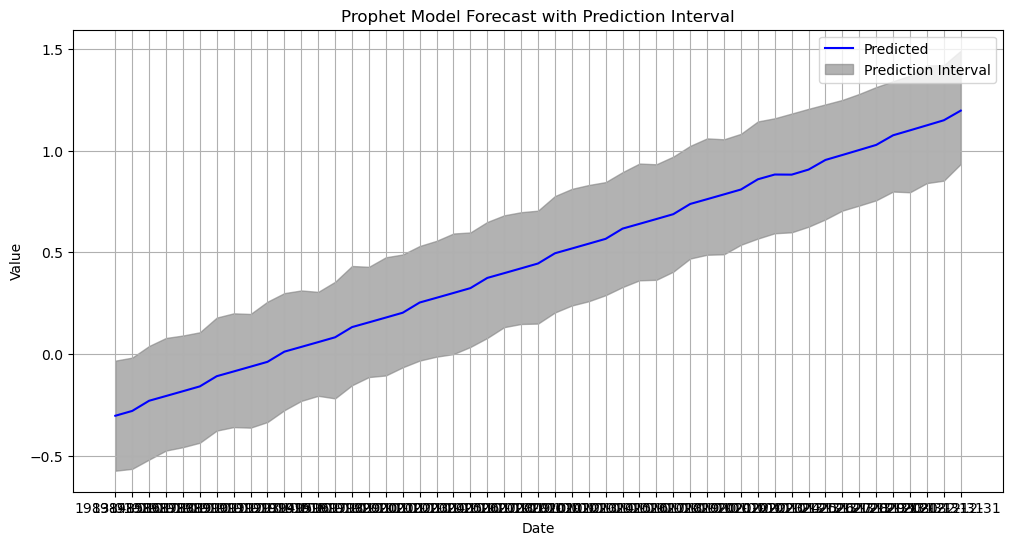

In [ ]:
ds = Prophet_model['ds']
yhat = Prophet_model['yhat']
yhat_lower = Prophet_model['yhat_lower']
yhat_upper = Prophet_model['yhat_upper']

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot 'ds' on the x-axis and 'yhat' on the y-axis
plt.plot(ds, yhat, label='Predicted', color='blue')

# Plot 'ds' on the x-axis and 'yhat_upper' and 'yhat_lower' as a shaded prediction interval
plt.fill_between(ds, yhat_lower, yhat_upper, color='gray', alpha=0.6, label='Prediction Interval')

# Customize the plot
plt.title('Prophet Model Forecast with Prediction Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()